# Sorting Algorithms

## Preparations

In [1]:
# Import libraries:
from random import choice, choices, seed
from time import time

%matplotlib inline

In [2]:
# Generate test arrays:
seed(1)
test_arrays = [choices(range(10**13), k=k) for k in [2**i for i in range(1,21)]]

In [3]:
# Set global variable to count number of iterations:
n_iterrations = 0

# Create function that runs selected algorithm with arrays of different sizes:
def generate_perfomance_metrics(alg, test_arrays, debug=False):
    
    # Setup the lists to store results:
    k_num = []
    i_num = []
    d_rec = []
    sorted_arrays = []
    
    # Reset the iteration counter:
    global n_iterrations
    n_iterrations = 0
    
    # Check the algorithm performance with different array lenth:
    for arr in test_arrays:

        # Save the start time:
        start = time()

        # Apply the algorithm:
        sorted_array = alg(arr)

        # Calculate the run time:
        dur = time() - start    
        
        # Save results into lists:
        k_num.append(len(arr))
        i_num.append(n_iterrations)
        d_rec.append(dur)
        sorted_arrays.append(sorted_array)

        # Print debug messages if neccessary:
        if debug:
            print('finished for k = {}'.format(len(arr)), end=',\t')
            print('elapsed time: {:.4f}'.format(dur))
        
    # return the results:
    return k_num, i_num, d_rec, sorted_arrays

---

## Quicksort (מיון מהיר)
https://ru.wikipedia.org/wiki/Быстрая_сортировка

In [4]:
def quick_sort(arr):
    
    # Check the lenth of the array:
    if len(set(arr)) < 2:
        return arr
    
    # Find the split point:
    p = arr[choice(range(len(arr)))]
    
    # Split the array and apply recursion:
    left  = quick_sort([i for i in arr if i <  p])
    right = quick_sort([i for i in arr if i >= p])

    # Update the global counter:
    global n_iterrations
    n_iterrations += 1
    
    # Return the result:
    return left + right

In [5]:
quick_k_num, quick_i_num, quick_d_rec, _ = generate_perfomance_metrics(quick_sort, test_arrays, debug=True)

finished for k = 2,	elapsed time: 0.0000
finished for k = 4,	elapsed time: 0.0000
finished for k = 8,	elapsed time: 0.0000
finished for k = 16,	elapsed time: 0.0000
finished for k = 32,	elapsed time: 0.0010
finished for k = 64,	elapsed time: 0.0000
finished for k = 128,	elapsed time: 0.0010
finished for k = 256,	elapsed time: 0.0010
finished for k = 512,	elapsed time: 0.0030
finished for k = 1024,	elapsed time: 0.0070
finished for k = 2048,	elapsed time: 0.0180
finished for k = 4096,	elapsed time: 0.0290
finished for k = 8192,	elapsed time: 0.0560
finished for k = 16384,	elapsed time: 0.1239
finished for k = 32768,	elapsed time: 0.2629
finished for k = 65536,	elapsed time: 0.5297
finished for k = 131072,	elapsed time: 1.2123
finished for k = 262144,	elapsed time: 2.6065
finished for k = 524288,	elapsed time: 5.2050
finished for k = 1048576,	elapsed time: 11.5114


---

## Merge sort (מיון מיזוג)
https://en.wikipedia.org/wiki/Merge_sort

In [6]:
def merge_sort(arr):
    
    # Check the array size:
    if len(set(arr)) < 2:
        return arr
    
    # Split the array into two halfs and apply recursive function:
    ind = int(len(arr)/2)
    left  = merge_sort(arr[:ind])
    right = merge_sort(arr[ind:])
    
    # Initialize subarray indexes:
    l, r = 0, 0
    
    # Initialize list to store united array:
    result = []
    
    # Add elements from subarrays in acsending order:
    while l < len(left) and r < len(right):
        
        # If the l-th element in the left subarray
        # is less than r-th element in the right subarray:
        if left[l] < right[r]:
            
            # Append the first element of the left subarray
            #to the result list and update index l:
            result.append(left[l])
            l += 1
        
        # Otherwise do the same operations with the right subarray:
        else:
            result.append(right[r])
            r += 1
    
    # If there are elements left in any of subarrays, add it to the result list:
    if l < len(left):
        result += left[l:]
    if r < len(right):
        result += right[r:]
    
    # Update the global counter:
    global n_iterrations
    n_iterrations += 1
    
    # Return the sorted array:
    return result

In [7]:
merge_k_num, merge_i_num, merge_d_rec, _ = generate_perfomance_metrics(merge_sort, test_arrays, debug=True)

finished for k = 2,	elapsed time: 0.0000
finished for k = 4,	elapsed time: 0.0000
finished for k = 8,	elapsed time: 0.0000
finished for k = 16,	elapsed time: 0.0000
finished for k = 32,	elapsed time: 0.0000
finished for k = 64,	elapsed time: 0.0000
finished for k = 128,	elapsed time: 0.0010
finished for k = 256,	elapsed time: 0.0010
finished for k = 512,	elapsed time: 0.0040
finished for k = 1024,	elapsed time: 0.0050
finished for k = 2048,	elapsed time: 0.0110
finished for k = 4096,	elapsed time: 0.0260
finished for k = 8192,	elapsed time: 0.0530
finished for k = 16384,	elapsed time: 0.1289
finished for k = 32768,	elapsed time: 0.2588
finished for k = 65536,	elapsed time: 0.5547
finished for k = 131072,	elapsed time: 1.0724
finished for k = 262144,	elapsed time: 2.2967
finished for k = 524288,	elapsed time: 4.9652
finished for k = 1048576,	elapsed time: 11.4224


---

## Heapsort (מיון ערימה)
https://en.wikipedia.org/wiki/Heapsort  
https://habr.com/ru/post/112222/

In [8]:
# Import libraries:
from math import log2, ceil

#### Create function to get the tree size and number of parent nodes:

In [9]:
def get_parent_nodes(heap):
    
    # Get the number of elements in the heap:
    heap_size = len(heap)
    
    # Number of heap levels = log2 of number of nodes (rounded up):
    tree_size = ceil(log2(heap_size))
    
    # Number of parent levels = tree size - 1 (last level has no children).
    # But in case there is only 2 elements in the tree parent levels = 1
    parent_levels = 1 if heap_size == 2 else tree_size - 1
    
    # Number of parent nodes = geometric series with b = 1 (first node),
    # q = 2 (binary tree) and n = parent_levels.
    # For our purpose we need to get the list of these nodes in descending order:
    parent_nodes = list(range(2**parent_levels - 1))[::-1]
    
    # Return results:
    return parent_nodes

#### Create Heapify procedure:

In [10]:
def heapify(heap, i):
    '''
    Rearranges  nodes in the heap starting from the node
    with the index i and then moves down the heap.
    Is uses global variable "heap" - list of numbers representing the heap
    '''
    
    # Get the heap size:
    heap_size = len(heap)
    
    # Find children indexes:
    ind_l = 2*i + 1 if 2*i + 1 < heap_size else False
    ind_r = 2*i + 2 if 2*i + 2 < heap_size else False
    
    # Extract node values:
    main  = heap[i]
    left  = heap[ind_l] if ind_l else -float('inf')
    right = heap[ind_r] if ind_r else -float('inf')
    
    # Check if the left child has the highest value:
    if left >=  right and left  > main:
        
        # Swap values:
        heap[i], heap[ind_l] = left, main
        
        # Run recursive function on updated child node:
        heap = heapify(heap, ind_l)
    
    # If left child is not the greatest one, check the right one:
    elif right > left and right > main:
        
        # Swap values:
        heap[i], heap[ind_r] = right, main
        
        # Run recursive function on updated child node:
        heap = heapify(heap, ind_r)
    
    # Update the global counter:
    global n_iterrations
    n_iterrations += 1
    
    # Return reordered heap:
    return heap

#### Create Heapsort procedure:

In [11]:
def heapsort(heap):
    '''
    Builds binary tree out of the passed array, then a sorted array is created
    by repeatedly removing the largest element from the root of the heap.
    The heap is updated after each removal to maintain the heap property.
    Once all objects have been removed from the heap, the result is a sorted array.
    '''
    
    # Create list to store result:
    result = []

    # Iterate untill one element remains in the heap:
    while len(heap) > 1:
        
        # Get the heap scale parameters:
        parent_nodes = get_parent_nodes(heap)
        
        # Reorder the heap:
        for node in parent_nodes:
            heap = heapify(heap, node)
        
        # Extract the largers element (heap root):
        result.append(heap[0])
        
        # Update the heap by replacing its root with the last element:
        heap[0] = heap[-1]
        
        # Remove the last element:
        heap = heap[:-1]
    
    # Append the last element of the heap to the result array:
    result += heap
    
    # Update the global counter:
    global n_iterrations
    n_iterrations += 1
    
    # Return the result:
    return result

#### Test performance:

In [12]:
heap_k_num, heap_i_num, heap_d_rec, _ = generate_perfomance_metrics(merge_sort, test_arrays, debug=True)

finished for k = 2,	elapsed time: 0.0000
finished for k = 4,	elapsed time: 0.0000
finished for k = 8,	elapsed time: 0.0000
finished for k = 16,	elapsed time: 0.0000
finished for k = 32,	elapsed time: 0.0000
finished for k = 64,	elapsed time: 0.0000
finished for k = 128,	elapsed time: 0.0010
finished for k = 256,	elapsed time: 0.0010
finished for k = 512,	elapsed time: 0.0030
finished for k = 1024,	elapsed time: 0.0080
finished for k = 2048,	elapsed time: 0.0160
finished for k = 4096,	elapsed time: 0.0250
finished for k = 8192,	elapsed time: 0.0530
finished for k = 16384,	elapsed time: 0.1199
finished for k = 32768,	elapsed time: 0.2538
finished for k = 65536,	elapsed time: 0.6256
finished for k = 131072,	elapsed time: 1.1533
finished for k = 262144,	elapsed time: 2.6215
finished for k = 524288,	elapsed time: 5.0261
finished for k = 1048576,	elapsed time: 11.0867


---

## Compare performance of different algorithms

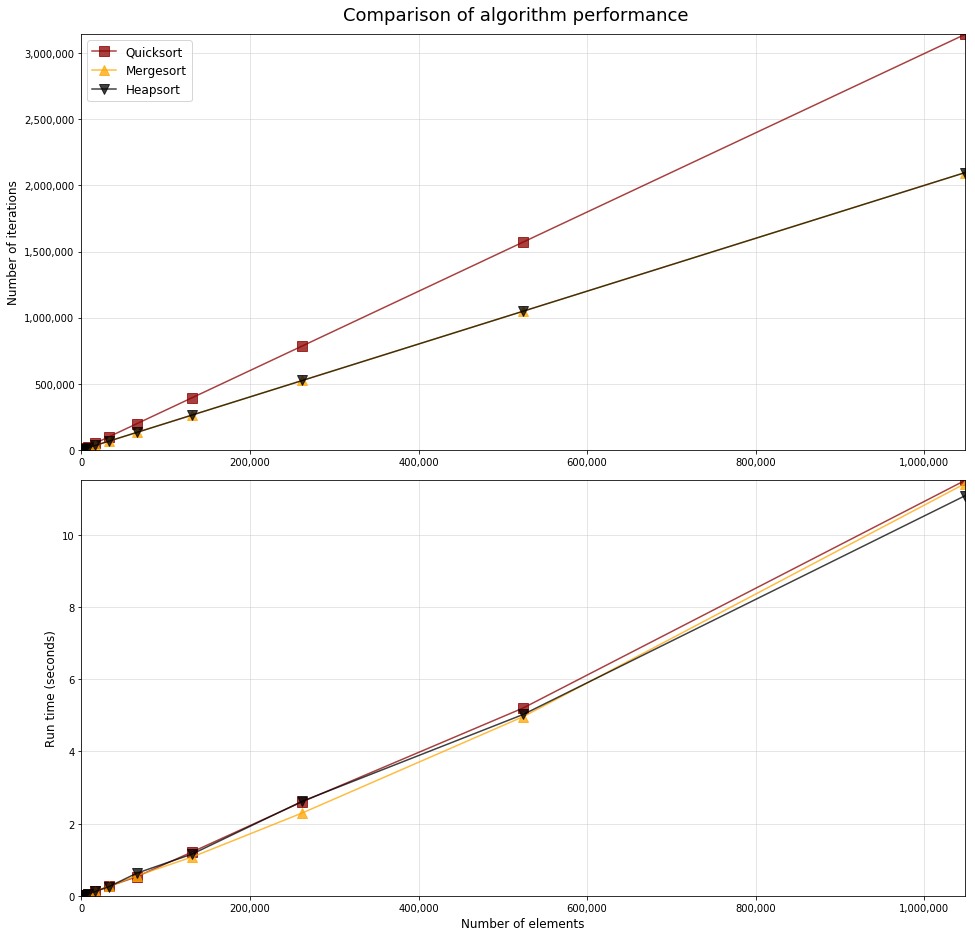

In [13]:
# Create graph object:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(13,13))

# Set figure properties:
fig.suptitle('Comparison of algorithm performance', fontsize=18)
fig.tight_layout()
fig.subplots_adjust(top=0.95)

''' ------------------------------------------ Performance metrics ------------------------------------------'''

# Add lines:
ax[0].plot(quick_k_num, quick_i_num, color='darkred', marker='s', ms=10, alpha=0.75, label='Quicksort')
ax[0].plot(merge_k_num, merge_i_num, color='orange',  marker='^', ms=10, alpha=0.75, label='Mergesort')
ax[0].plot(heap_k_num,  heap_i_num,  color='black',   marker='v', ms=10, alpha=0.75, label='Heapsort')

# Set axis properties:
ax[0].grid(color='silver', alpha=0.4, linestyle='-', linewidth=1)
ax[0].set_xlim(0,max(quick_k_num))
ax[0].set_ylim(0,max(max(quick_i_num),max(merge_i_num),max(heap_i_num)))
ax[0].set_ylabel('Number of iterations', fontsize=12)
ax[0].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax[0].legend(fontsize=12)

''' -------------------------------------------- Run time metrics -------------------------------------------'''
# Add lines:
ax[1].plot(quick_k_num, quick_d_rec, color='darkred', marker='s', ms=10, alpha=0.75, label='Quicksort')
ax[1].plot(merge_k_num, merge_d_rec, color='orange',  marker='^', ms=10, alpha=0.75, label='Mergesort')
ax[1].plot(heap_k_num,  heap_d_rec,  color='black',   marker='v', ms=10, alpha=0.75, label='Heapsort')

# Set axis properties:
ax[1].grid(color='silver', alpha=0.4, linestyle='-', linewidth=1)
ax[1].set_xlim(0,max(quick_k_num))
ax[1].set_ylim(0,max(max(quick_d_rec),max(merge_d_rec),max(heap_d_rec)))
ax[1].set_ylabel('Run time (seconds)', fontsize=12)
ax[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

ax[1].set_xlabel('Number of elements', fontsize=12)


plt.show()